In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
from PIL import Image
import numpy as np
import json
from time import sleep



In [23]:
options = Options()
driver = webdriver.Chrome(options=options)

In [24]:
with open('settings.json',"r", encoding="utf-8") as f:
    login_password = json.load(f)
log_path = 'https://mapa-turystyczna.pl/login'
path ='https://mapa-turystyczna.pl/account/route/2151079'

In [25]:
driver.get(log_path)

In [26]:
#accept cookies
driver.find_element(By.CLASS_NAME,'fc-button-label').click()


In [28]:
#login 
driver.find_element(By.NAME,"signin[username]").send_keys(login_password["login"]) 
driver.find_element(By.NAME,"signin[password]").send_keys(login_password["password"]) 
driver.find_element(By.CSS_SELECTOR,'.mdl-button--primary.mdl-button--primary.mdl-button--raised').click()
sleep(2)



In [29]:
driver.get(path)

In [30]:
# get html code to scrap data such as distance
html = driver.page_source


In [32]:
soup = BeautifulSoup(html)
soup.find('div', class_='ts-user-route__data-inline-item').get_text()[25:].replace('\n','').replace('\t','').replace(',',', ')

'Zadni Granat, 2240 m n.p.m.'

In [33]:
soup = BeautifulSoup(html)
hightest_point =soup.find('div', class_='ts-user-route__data-inline-item').get_text()[25:].replace('\n','').replace('\t','').replace(',',', ')
index = hightest_point.find('m n.p.m')
max_height = int(hightest_point[index-5:index -1])
max_height

2240

In [43]:
data = soup.find_all("span", class_= 'ts-user-activity__data-item-value ts-user-activity__data-item-value--primary')
distance = data[0].get_text().strip()
true_time = data[1].get_text().split("h")[0].strip()
up = data[2].get_text().strip()
down = data[3].get_text().strip()

In [44]:
profil_json= json.loads(soup.find('div', class_="ts-user-activity__profile ts-profile-container").attrs["data-profile"])
min_height = 2000
for dict in profil_json['segments']:
    # print(dict)
    temp = dict['elevation']
    print(temp, type(temp))
    if temp < min_height:
    
        min_height = temp
        print(min_height, '---------------------------')

print(max_height, min_height)
elevation = f'{int(max_height - min_height)} m'

1025 <class 'int'>
1025 ---------------------------
1017.0900000000588 <class 'float'>
1017.0900000000588 ---------------------------
1498.9999999998345 <class 'float'>
1508.993252800002 <class 'float'>
1516.2091814399603 <class 'float'>
1507.667199999987 <class 'float'>
1509.289647999984 <class 'float'>
1627.5286156799905 <class 'float'>
1636.999999999974 <class 'float'>
1766.0000000003893 <class 'float'>
1854.0371728000664 <class 'float'>
1934.892065600045 <class 'float'>
2166.6520831999546 <class 'float'>
2239.9999999995794 <class 'float'>
2225.000000000473 <class 'float'>
2208.3702792249433 <class 'float'>
1636.999999999974 <class 'float'>
1627.5286156799905 <class 'float'>
1509.289647999984 <class 'float'>
1507.667199999987 <class 'float'>
1516.2091814399603 <class 'float'>
1508.993252800002 <class 'float'>
1498.9999999998345 <class 'float'>
1094.0096000000194 <class 'float'>
1017.0900000000588 <class 'float'>
1025 <class 'int'>
2240 1017.0900000000588


In [45]:
elevation

'1222 m'

In [46]:
true_time

'10:14'

In [51]:
def true_time_to_time(scrap_time : str , mul : float ):  
    """Czas zeskrapowany w formacie hh:mm  zminia na sa hh  mnożąc czas przes zdefiniowaną stałą np 
    4:47 h zmienia na 6 h dla stałej wynoszącej 1.2"""
    
    return str(round((int(scrap_time[:-3]) + int(scrap_time[-2:])/60) * mul )) + ' h'

In [52]:
true_time_to_time(true_time,1.2)

'12 h'

In [53]:
true_time[2:4]

':1'

In [54]:

profil_json= json.loads(soup.find('div', class_="ts-user-activity__profile ts-profile-container").attrs["data-profile"])

min_height = 2000
for dict in profil_json['segments']:
    # print(dict)
    temp = dict['elevation']
    if temp < min_height:
        min_height = temp

print(min_height)
elevation_gain = f'{int(max_height - min_height)} m'
print(elevation_gain)

1017.0900000000588
1222 m


In [55]:
#go to proile and save it 
driver.get(path + '/profile')
sleep(1)
select = Select(driver.find_element(By.ID,'profile-size-type'))
select.select_by_visible_text('Szeroki')
driver.find_element(By.ID,'ts-ep-static').screenshot('zdjecie.png')

True

In [59]:
#cover time in profile
img= Image.open('zdjecie.png')
im = np.array(img)
im[0:65,0:400] = [255, 255, 255, 255]
Image.fromarray(im).save('zdjecie.png')

In [60]:
im.shape

(362, 909, 4)

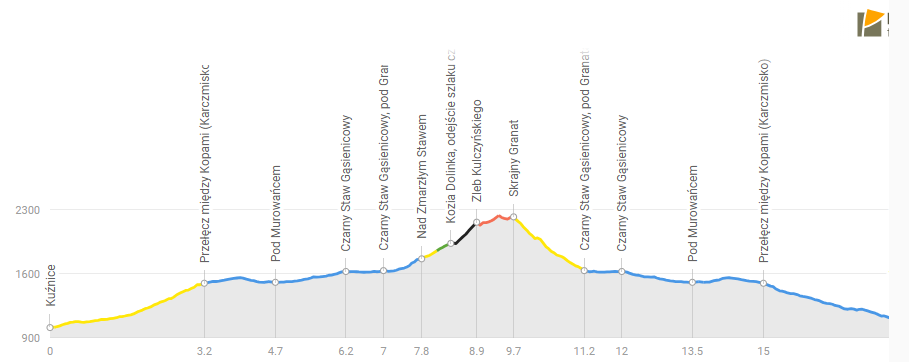

In [61]:
img